In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [7]:
X1, X2 = make_regression(n_samples = 300, n_features=1, noise=10, random_state=40)
print(X1.shape, X2.shape)

(300, 1) (300,)


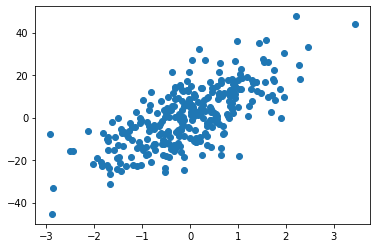

In [8]:
plt.scatter(X1, X2)
plt.show()

In [9]:
X = np.concatenate([X1, X2.reshape(-1,1)], axis=1)
print(X.shape)

(300, 2)


### PCs are nothing but eigen vectors $X^{T}X$, X should be centralized, mean=0.

In [49]:
X = (X-X.mean(axis=0))/X.std(axis=0)

In [50]:
eigen_val, eigen_vectors = np.linalg.eig(X.T.dot(X))
print(eigen_val)
print(eigen_vectors)

[ 84.71150406 515.28849594]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [51]:
pc1 = eigen_vectors[:, np.argsort(eigen_val)[-1]]
pc2 = eigen_vectors[:, np.argsort(eigen_val)[-2]]
print(pc1, "\n", pc2)

[-0.70710678 -0.70710678] 
 [-0.70710678  0.70710678]


In [52]:
# pc1, pc2 are perpendicular to each other, pc1.pc2 = 0
pc1.dot(pc2.reshape(-1,1))

array([0.])

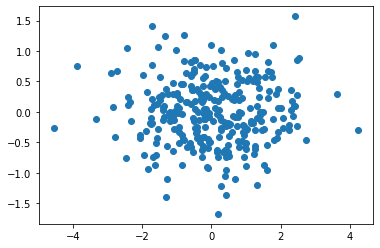

In [53]:
plt.scatter(X.dot(pc1.reshape(-1,1)), X.dot(pc2.reshape(-1,1)))
plt.show()

In [20]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [54]:
pca = pca.fit(X)

In [55]:
pca.n_components_

2

In [56]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [57]:
pca.explained_variance_

array([1.7233729 , 0.28331607])

In [58]:
X_transformed = pca.transform(X)

In [59]:
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:,1]
print(pc1,"\n", pc2)

[0.70710678 0.70710678] 
 [ 0.70710678 -0.70710678]


In [60]:
pc1.dot(pc2.reshape(-1,1)) # pc1 and pc2 are perpendicular to each other 

array([0.])

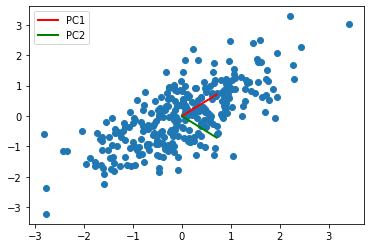

In [62]:
plt.scatter(X[:,0], X[:,1])
plt.plot([0, pc1[0]], [0, pc1[1]], color="red", lw=2, label="PC1")
plt.plot([0, pc2[0]], [0, pc2[1]], color="green", lw=2, label='PC2')
plt.legend()
plt.show()

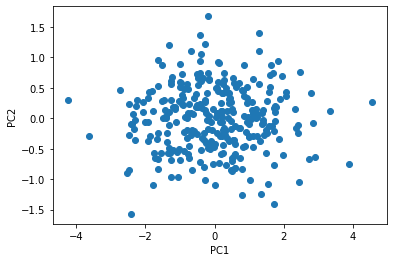

In [63]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], label="Transformed data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()